# Support Vector Machine

## 1. What is Support Vector Machine?
“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well (look at the below snapshot).

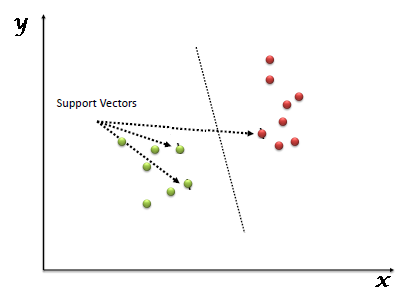

In [1]:
from IPython.display import Image
Image(filename='SVM_1.png')

__Support Vectors__ are the data points that lie closest to the decision hyperplane.

__Support Vector Machine__ is a frontier which best segregates the two classes (hyper-plane/ line).

## 2. Kernel Trick

SVMs are powerful in the sense that they can generate non-linear decision boundaries. Kernels help in __projecting data to a higher dimensional space__ where the points can be linearly seperated. Kernel methods implicits feature space without ever computing the coordinates of the data in that space, but rather by simply computing the inner products between the images of all pairs of data in the feature space. This operation is often computationally cheaper than the explicit computation of the coordinates. 

Kernel is a way of computing the dot product of two vectors __x__ and __y__ in some (possibly very high dimensional) feature space, which is why kernel functions are sometimes called "generalized dot product". Suppose we have a mapping: $\varphi: \mathbb{R}^n \rightarrow \mathbb{R}^m$ that brings our vectors in $\mathbb{R}^n$ to some feature space $\mathbb{R}^m$. Then the dot product of __x__ and __y__ in this space is $\varphi(x)^T\varphi(y)$. A kernel is a function $k$ that corresponds to this dot product, i.e. $k(x, y) = \varphi(x)^T\varphi(y)$.

* __Polynomial Kernel__

$k(x, y) = (1+x^Ty)^d$ with $x,y \in \mathbb{R}^d$

It is popular in image processing.

When $d=2$, $x=(x_1, x_2), y=(y_1, y_2)$: 

$$k(x, y) = (1+x^Ty)^2=(1+x_1y_1+x_2y_2)^2=1+x_1^2y_1^2+x_2^2y_2^2+2x_1y_1+2x_2y_2+2x_1x_2y_1y_2$$

Note that this is nothing else but a dot product between two vectors $(1, x_1^2, x_2^2, \sqrt{2}x_1, \sqrt{2}x_1, \sqrt{2}x_1x_2)$ and $(1, y_1^2, y_2^2, \sqrt{2}y_1, \sqrt{2}y_1, \sqrt{2}y_1y_2)$, and $\varphi(x)=\varphi(x_1,x_2)=(1, x_1^2, x_2^2, \sqrt{2}x_1, \sqrt{2}x_1, \sqrt{2}x_1x_2)$. So the kernel $k(x, y) = (1+x^Ty)^2=\varphi(x)^T\varphi(y)$ computes a dot product in 6-dimensional space without explicitly visiting this space.  

* __Gaussian radial basis function (RBF)__

$k(x, y) = \exp(-\gamma \lVert x-y \rVert^2) $

It is general-purpose kernel, used when there is no prior knowledge about the data.

Sometimes parametrized using: $\gamma=\frac{1}{2\sigma^2}$  __(Gaussian Kernel)__

If we Taylor-expand this function, we'll see that it corresponds to an infinite-dimensional codomain of $\varphi$.

It is a good idea to start with a __quadratic polynomial__ and work your way up into some of the more exotic kernel functions till we reach a desired accuracy level. 

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [68]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Linear Boundaries

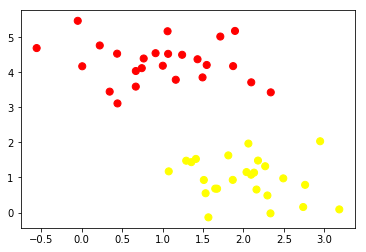

In [69]:
# Sample dataset
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

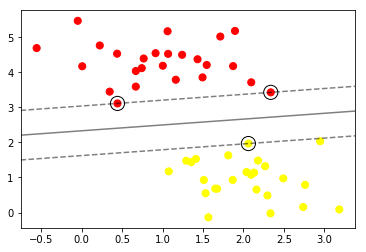

In [70]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=200, lw=1, facecolors='None', edgecolors='black')
plt.show()

### Beyond linear boundaries: Kernel SVM

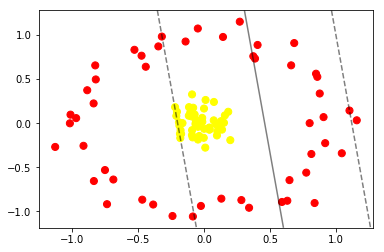

In [71]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)
plt.show()

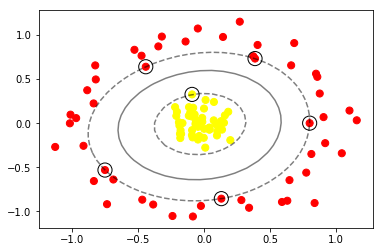

In [72]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, lw=1, facecolors='None', edgecolors='black')
plt.show()

## 3. Tune Hyperparameters

### $C$ Parameter
It affects the trade-off between complexity and proportion of nonseparable samples.

When data has some amount of overlap and no perfect decision boundary exists. For example:

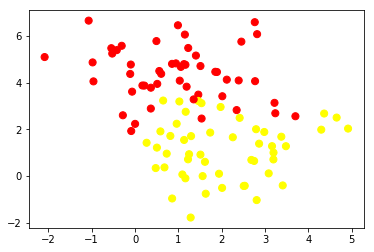

In [73]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

There is a parameter known as $C$ could control the hardness of the margin. For very large $C$, the margin is hard, and points cannot lie in it. For smaller $C$, the margin is softer, and can grow to encompass some points.

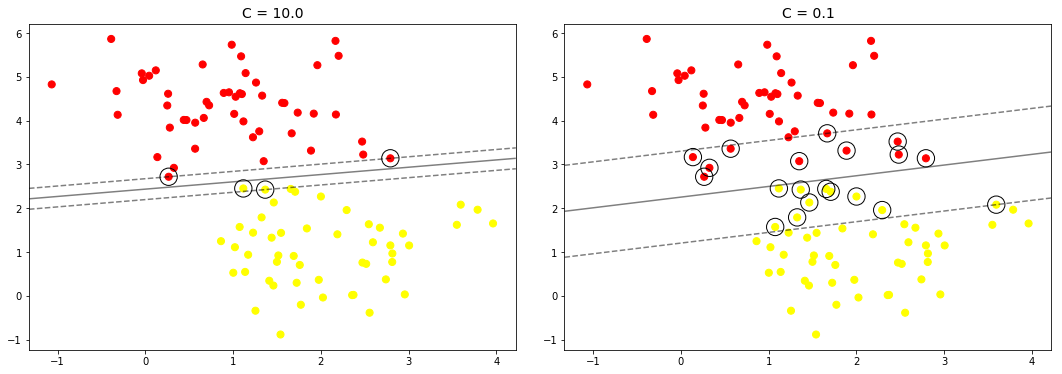

In [74]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='None', edgecolors='black');
    axi.set_title('C = {0:.1f}'.format(C), size=14)
    
plt.show()

The optimal value of the $C$ parameter will depend on your dataset, and should be tuned using cross-validation or a similar procedure.

### Kernel Parameters
Kernel parameters also have a significant effect on the decision boundary. The degree of the polynomial kernel and the width parameter of the Gaussian kernel control the flexibility of the resulting classifier

#### degree: The degree of the polynomial kernel

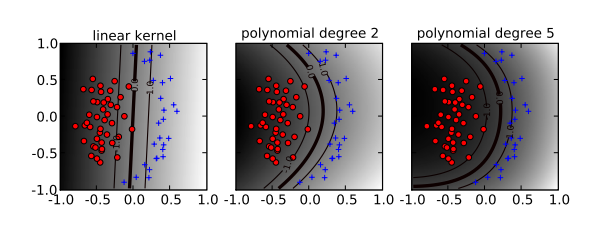

In [75]:
from IPython.display import Image
Image(filename='degree.png')

Higher degree polynomial kernels allow a more flexible decision boundary

#### gamma: The width parameter of the Gaussian kernel

The the figure shows the effect of the inverse-width parameter of the Gaussian kernel $(\gamma)$ for a fixed value
of the soft-margin constant.  

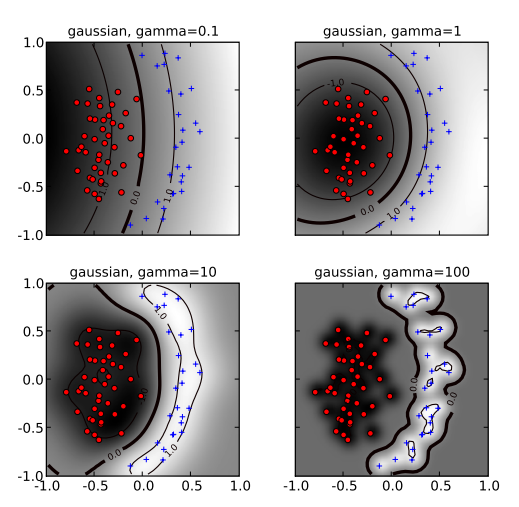

In [76]:
from IPython.display import Image
Image(filename='gamma.png')

For small values of $\gamma$ (upper left) the decision boundary is nearly linear. As $\gamma$ increases the flexibility of the decision boundary increases. Large values of $\gamma$ lead to overfitting (bottom).

## 4. Pros and Cons associated with SVM
* Pros:

  * It works really well with clear margin of separation
  
  * It is effective in high dimensional spaces.
  
  * It is effective in cases where number of dimensions is greater than the number of samples.
  
  * It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Cons:

  * It doesn’t perform well, when we have large data set because the required training time is higher
  
  * It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
  
  * SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is related SVC method of Python scikit-learn library.

## Reference

Code: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

Parameter: http://www.svms.org/parameters/